In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import bloscpack as bp
%matplotlib inline

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *

from registration_utilities import *
from annotation_utilities import *
from vis3d_utilities import *

Setting environment for Local Macbook Pro


In [2]:
# stack_moving = 'MD585'
# stack_fixed = 'MD589'

In [3]:
atlas_name = 'atlasV3'

In [4]:
# volume_fixed = DataManager.load_annotation_volume(stack=stack_fixed, downscale=32)
# volume_moving = DataManager.load_annotation_volume(stack=stack_moving, downscale=32)

# print volume_fixed.shape
# print volume_moving.shape

In [5]:
# label_to_name_m, name_to_label_m = DataManager.load_volume_label_to_name(stack_moving)
# label_to_name_f, name_to_label_f = DataManager.load_volume_label_to_name(stack_fixed)

In [6]:
# colors = {name_u: np.random.randint(0,255,3)/255.
#           for name_u in set([convert_name_to_unsided(name_s) for name_s in name_to_label_m.keys()])}

# Generate transformed annotation volume meshes

Untransformed annotation volume meshes are generated in `visualize_annotationVolume2`

In [63]:
warp_setting = 9

In [64]:
volume_m_alignedTo_f = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, type_m='annotation_as_score',
                                                            stack_f=stack_fixed, type_f='annotation_as_score',
                                                                                warp_setting=warp_setting,
                                                                               sided=True)

File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/score_volumes/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_Sp5C_R.bp
Score volume for Sp5C_R does not exist.
File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/score_volumes/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_sp5.bp
Score volume for sp5 does not exist.
File does not exist: /home/yuncong/CSHL_volumes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/score_volumes/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_outerContour.bp
Score volume for outerContour does not exist.


In [68]:
vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax = \
DataManager.load_volume_bbox(stack_fixed, type='annotation', downscale=32)
print vol_f_xmin, vol_f_xmax, vol_f_ymin, vol_f_ymax, vol_f_zmin, vol_f_zmax

# This is the bbox of annotation volume in aligned uncropped specimen space.

622 1042 155 502 127 503


In [69]:
for name_s, label in name_to_label_m.iteritems():
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(volume_m_alignedTo_f[name_s])
    vol = volume_m_alignedTo_f[name_s][ymin:ymax+1, xmin:xmax+1, zmin:zmax+1].astype(np.float)

    t = time.time()
    # These origins are with respect to aligned uncropped specimen space.
    polydata = volume_to_polydata(vol, origin=(vol_f_xmin+xmin, vol_f_ymin+ymin, vol_f_zmin+zmin), 
                                  num_simplify_iter=3, smooth=True)
    sys.stderr.write('time: %.2f seconds.\n' % (time.time() - t) )
    
    fp = DataManager.get_mesh_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                                          type_f='annotation_as_score',
                                                          type_m='annotation_as_score',
                                                          structure=name_s, warp_setting=9)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(polydata, fp)

marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 3229: 0.05 seconds
simplify 1 @ 646: 0.02 seconds
time: 0.13 seconds.
marching cube: 0.10 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 24090: 0.24 seconds
simplify 1 @ 4819: 0.22 seconds
simplify 2 @ 965: 0.04 seconds
time: 0.64 seconds.
marching cube: 0.05 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 18945: 0.17 seconds
simplify 1 @ 3791: 0.16 seconds
simplify 2 @ 759: 0.03 seconds
time: 0.43 seconds.
marching cube: 0.03 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 12556: 0.10 seconds
simplify 1 @ 2513: 0.10 seconds
simplify 2 @ 504: 0.02 seconds
time: 0.27 seconds.
marching cube: 0.01 seconds
mesh_to_polydata: 0.00 seconds
simplify 0 @ 2342: 0.02 seconds
simplify 1 @ 470: 0.02 seconds
time: 0.05 seconds.
marching cube: 0.13 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 10714: 0.19 seconds
simplify 1 @ 2144: 0.14 seconds
simplify 2 @ 430: 0.03 seconds
time: 0.52 seconds.
marching cube: 0

# Load meshes of annotated specimens

In [4]:
warp_setting = 9

In [5]:
moving_volume_alignedTo_fixed_volume_polydata_list = \
DataManager.load_meshes(stack_m=stack_moving, stack_f=stack_fixed, warp_setting=warp_setting, 
                       type_m='annotation_as_score', type_f='annotation_as_score', trial_idx=0, sided=True)

NameError: name 'stack_moving' is not defined

In [77]:
# Load moving volume

moving_volume_polydata_list = DataManager.load_meshes(stack_m=stack_moving, type_m='annotation_as_score', 
                                                      trial_idx=None,
                                                     sided=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_Sp5C_R.stl
Mesh is empty: Sp5C_R.
Error loading mesh for Sp5C_R.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume/MD585_down32_annotationAsScoreVolume_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.


In [78]:
# Load fixed volume

fixed_volume_polydata_list = DataManager.load_meshes(stack_m=stack_fixed, type_m='annotation_as_score', 
                                                      trial_idx=None,
                                                     sided=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationAsScoreVolume/MD589_down32_annotationAsScoreVolume_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD589/MD589_down32_annotationAsScoreVolume/MD589_down32_annotationAsScoreVolume_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.


In [10]:
# # Show each structure in one color

# volume_m_alignedTo_f_mesh_actors = [actor_mesh(polydata, colors[convert_name_to_unsided(name_s)], wireframe=True, opacity=1.) 
#                for name_s, polydata in moving_volume_alignedTo_fixed_volume_polydata_list.iteritems()]

# volume_f_mesh_actors = [actor_mesh(polydata, colors[convert_name_to_unsided(name_s)], wireframe=True, opacity=1.) 
#                for name_s, polydata in fixed_volume_polydata_list.iteritems()]

# launch_vtk(volume_m_alignedTo_f_mesh_actors + volume_f_mesh_actors)

In [50]:
# # Show each brain in one color

# volume_m_alignedTo_f_mesh_actors = [actor_mesh(polydata, (1,0,1), wireframe=False, opacity=.5) 
#                for name_s, polydata in moving_volume_alignedTo_fixed_volume_polydata_list.iteritems()]

# volume_f_mesh_actors = [actor_mesh(polydata, (0,0,1), wireframe=True, opacity=.5, 
#                                    origin=(0,0,0)) 
#                for name_s, polydata in fixed_volume_polydata_list.iteritems()]

# volume_m_mesh_actors = [actor_mesh(polydata, (0,1,1), wireframe=True, opacity=.5,
#                                   origin=(0,0,0)) 
#                for name_s, polydata in moving_volume_polydata_list.iteritems()]

In [43]:
# launch_vtk(volume_m_alignedTo_f_mesh_actors + volume_f_mesh_actors + volume_m_mesh_actors)

In [71]:
# launch_vtk(volume_m_alignedTo_f_mesh_actors + volume_f_mesh_actors)

In [66]:
# launch_vtk(volume_f_mesh_actors + volume_m_mesh_actors, init_angle='30')

In [7]:
launch_vtk(
        [actor_mesh(polydata, (0,0,1), wireframe=True, opacity=1) 
             for name_s, polydata in fixed_volume_polydata_list.iteritems()] + \
           
           [actor_mesh(polydata, (0,1,0), wireframe=True, opacity=1)
               for name_s, polydata in moving_volume_alignedTo_fixed_volume_polydata_list.iteritems()] + \
    
    [actor_mesh(polydata, (1,0,0), wireframe=True, opacity=1)
               for name_s, polydata in moving_volume_polydata_list.iteritems()],
           
#           [actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255., origin=canonical_centroid) 
#                     for n, polydata in atlas_space_structure_meshes.iteritems()])
#            [actor_mesh(polydata, color=(1,1,1), wireframe=True, origin=canonical_centroid) 
#                     for n, polydata in atlas_space_structure_meshes.iteritems()] + \
#             [actor_mesh(shell_polydata, opacity=.2)],
          init_angle='horizontal_topDown')

NameError: name 'fixed_volume_polydata_list' is not defined

# Load meshes of annotated specimens (more than two stacks)

In [8]:
warp_setting = 9

In [9]:
stack_fixed = 'MD589'
stacks_moving = ['MD585', 'MD594']

In [10]:
# These origins are with respect to aligned uncropped specimen space.

moving_volume_alignedTo_fixed_volume_polydata_list_all_stacks = \
{stack_moving: \
DataManager.load_meshes(stack_m=stack_moving, stack_f=stack_fixed, warp_setting=warp_setting, 
                       type_m='annotation_as_score', type_f='annotation_as_score', trial_idx=0, sided=True)
    for stack_moving in stacks_moving}

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_Sp5C_R.stl
Mesh is empty: Sp5C_R.
Error loading mesh for Sp5C_R.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/MD585/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0/MD585_down32_annotationAsScoreVolume_warp_9_MD589_down32_annotationAsScoreVolume_trial_0_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/

# Generate atlas (average shapes at average positions)

In [38]:
centroid_allLandmarks = defaultdict(list)
polydata_list_allLandmarks = {}
average_polydata_allLandmarks = {}
prob_shape_allLandmarks = {}
prob_shape_origin_allLandmarks = {}

In [39]:
# for name_u in all_known_structures:
for name_u in ['SC']:

    print name_u
    
    #############################################################
    ## Collect meshes of the same structure (both hemispheres) ##
    #############################################################
    
    try:
        
        # Points in vertices_list and faces_list are wrt to aligned uncropped fixed specimen space.
    
        vertices_list = []
        faces_list = []

        if name_u in singular_structures: # If structure is singular

            # Load the instance in fixed stack.
            vertices, faces = DataManager.load_mesh(stack_m=stack_fixed, 
                                                    structure=name_u, 
                                                    type_m='annotation_as_score',
                                                    return_polydata_only=False,
                                                    trial_idx=None)


            vertices_mirrored = vertices.copy()
            zmean = vertices[:,2].mean(axis=0)
            vertices_mirrored[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin        

            vertices_list.append(vertices)
            faces_list.append(faces)

            vertices_list.append(vertices_mirrored)
            faces_list.append(faces)

            centroid = vertices.mean(axis=0)
            centroid_allLandmarks[name_u].append(centroid)

            # Load instances in moving stacks.
            for stack_moving in stacks_moving:

                vertices, faces = DataManager.load_mesh(stack_m=stack_moving, 
                                                        type_m='annotation_as_score',
                                                        stack_f=stack_fixed,
                                                        type_f='annotation_as_score',
                                                        structure=name_u, 
                                                        return_polydata_only=False,
                                                        warp_setting=warp_setting)

                vertices_mirrored = vertices.copy()
                zmean = vertices[:,2].mean(axis=0)
                vertices_mirrored[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin        

                vertices_list.append(vertices)
                faces_list.append(faces)

                vertices_list.append(vertices_mirrored)
                faces_list.append(faces)

                centroid = vertices.mean(axis=0)
                centroid_allLandmarks[name_u].append(centroid)

        else: # If structure is paired

            lname = convert_to_left_name(name_u)
            rname = convert_to_right_name(name_u)

            label_to_name_f, name_to_label_f = DataManager.load_volume_label_to_name(stack_fixed)

            # Load instances from fixed stack.
            if lname in name_to_label_f:

                vertices, faces = DataManager.load_mesh(stack_m=stack_fixed,
                                                        type_m='annotation_as_score',
                                                        structure=lname, 
                                                        return_polydata_only=False,
                                                       trial_idx=None)

                zmean = vertices[:,2].mean(axis=0)
                vertices[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin

                vertices_list.append(vertices)
                faces_list.append(faces)

                centroid = vertices.mean(axis=0)
                centroid_allLandmarks[lname].append(centroid)

            if rname in name_to_label_f:

                # !!! Right shape is used as the template !!!

                vertices, faces = DataManager.load_mesh(stack_m=stack_fixed,
                                                        type_m='annotation_as_score',
                                                        structure=rname, 
                                                        return_polydata_only=False,
                                                       trial_idx=None)

                vertices_list.append(vertices)
                faces_list.append(faces)

                centroid = vertices.mean(axis=0)
                centroid_allLandmarks[rname].append(centroid)

            # Load instances from moving stacks.
            for stack_moving in stacks_moving:

                label_to_name_m, name_to_label_m = DataManager.load_volume_label_to_name(stack_moving)

                if lname in name_to_label_m:

                    vertices, faces = DataManager.load_mesh(stack_m=stack_moving,
                                                            type_m='annotation_as_score',
                                                            stack_f=stack_fixed, 
                                                            type_f='annotation_as_score',
                                                            structure=lname, 
                                                            return_polydata_only=False,
                                                           warp_setting=warp_setting)

                    zmean = vertices[:,2].mean(axis=0)
                    vertices[:, 2] = - (vertices[:, 2] - zmean) + zmean # mirror L to align with R, keep zmin

                    vertices_list.append(vertices)
                    faces_list.append(faces)


                    centroid = vertices.mean(axis=0)
                    centroid_allLandmarks[lname].append(centroid)

                if rname in name_to_label_m:

                    vertices, faces = DataManager.load_mesh(stack_m=stack_moving, type_m='annotation_as_score',
                                                            stack_f=stack_fixed, type_f='annotation_as_score',
                                                            structure=rname, 
                                                            return_polydata_only=False,
                                                           warp_setting=warp_setting)

                    vertices_list.append(vertices)
                    faces_list.append(faces)

                    centroid = vertices.mean(axis=0)
                    centroid_allLandmarks[rname].append(centroid)


        #############################################
        ## Align meshes of all collected instances ##
        #############################################
        
        # All meshes in vertices_aligned_list have vertex centroid at (0,0).
        # In other words, all meshes are shifted such that vertex centroids coincide at a point defined as (0,0).
        # Call this point the common centroid.
        
        vertices_aligned_list = [] 

        for i, vertices in enumerate(vertices_list):

            #  Align all instances to the first instance
            if i == 0:
                vertices1 = vertices.copy()
                vertices_aligned_list.append(vertices1 - vertices1.mean(axis=0))
            else:            
                t = time.time()                    
                vertices_alignedTo1 = icp(fixed_pts=vertices1, moving_pts=vertices, num_iter=100, rotation_only=True)
                sys.stderr.write('icp, instance %d: %.2f seconds.\n' % (i, time.time() - t))

                vertices_aligned_list.append(vertices_alignedTo1 - vertices_alignedTo1.mean(axis=0))

        ###########################
        ## Compute average shape ##
        ###########################
    
        # polydata_list, prob_shape_origin and average_polydata are wrt to the common centroid.
        # prob_shape is a compact volume.
        
        polydata_list = [mesh_to_polydata(vs, fs) for vs, fs in zip(vertices_aligned_list, faces_list)]
        
        # If is singular structure, force the prob volume symmetric.
        prob_shape, prob_shape_origin, average_polydata = average_shape(polydata_list, 
                                                            consensus_percentage=.5,
                                                            num_simplify_iter=3, smooth=True,
                                                           force_symmetric=(name_u in singular_structures), 
                                                            sigma=2.)
        
        polydata_list_allLandmarks[name_u] = polydata_list
        average_polydata_allLandmarks[name_u] = average_polydata
        prob_shape_allLandmarks[name_u] = prob_shape
        prob_shape_origin_allLandmarks[name_u] = prob_shape_origin

    except Exception as e:
        sys.stderr.write('Error generating average shape for %s : %s\n' % (name_u, str(e)))

SC


icp, instance 1: 243.57 seconds.
icp, instance 2: 102.20 seconds.
icp, instance 3: 237.12 seconds.
icp, instance 4: 209.96 seconds.
icp, instance 5: 222.35 seconds.
polydata_to_volume: 0.20 seconds.
polydata_to_volume: 0.19 seconds.
polydata_to_volume: 0.23 seconds.
polydata_to_volume: 0.24 seconds.
polydata_to_volume: 0.21 seconds.
polydata_to_volume: 0.20 seconds.
Error generating average shape for SC : global name 'gaussian' is not defined


# Export visualization of (1) individual instances (2) aligned instances (3) probabilistic shape (4) thresholded shape.

In [9]:
instance_colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1)] # assume each structure has at most 6 instances.

for structure in polydata_list_allLandmarks.keys():
    
    print structure
    
    for direction in ['coronal', 'sagittal', 'horizontal']:

        # Show each instance separately

        for i, polydata in enumerate(polydata_list_allLandmarks[structure]):
            instance_actors = actor_mesh(polydata, instance_colors[i], opacity=1, wireframe=False)

            fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_'+str(i))
            create_parent_dir_if_not_exists(fp)
            launch_vtk([instance_actors], snapshot_fn=fp, interactive=False, init_angle=direction)

        # Show different instances shown aligned together

        instance_actors = [actor_mesh(polydata, instance_colors[i], opacity=1., wireframe=True) 
                           for i, polydata in enumerate(polydata_list_allLandmarks[structure])]

        icp_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_icpAligned')
        launch_vtk(instance_actors, snapshot_fn=icp_fp, interactive=False, init_angle=direction)

        # Show voxel-voted probabilistic shape

        prob_shape_actor = actor_volume(prob_shape_allLandmarks[structure].astype(np.float32), 
                                        what='probability', origin=prob_shape_origin_allLandmarks[structure])

        prob_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                         structure=structure, suffix=direction+'_probShape')
        launch_vtk([prob_shape_actor], snapshot_fn=prob_shape_fp, interactive=False, init_angle=direction)

        # Show voxel-voted probabilistic shape, thresholded at .5

        actor = actor_mesh(average_polydata_allLandmarks[structure], [1,1,1], opacity=1, wireframe=True)
        thresh_shape_fp = DataManager.get_prob_shape_viz_filepath(stack_m=atlas_name, trial_idx=None, 
                                                                structure=structure, suffix=direction+'_thresh0.5')
        launch_vtk([actor], snapshot_fn=thresh_shape_fp, interactive=False, init_angle=direction)

Tz
VCA
7n
DC
5N
3N
Pn
10N
LC
7N
Amb
12N
RMC
Sp5O
Sp5I
Sp5C
VCP
AP
PBG
LRt
IC
VLL
4N
SNC
6N
SNR
SC
RtTg


# Interactive

In [ ]:
instance_colors = [(1,0,0),(0,1,0),(0,0,1),(1,1,0),(0,1,1),(1,0,1)] # assume each structure has at most 6 instances.

for structure in polydata_list_allLandmarks.keys():
    
    print structure
    
    direction = 'coronal'
    
#     # Show each instance separately

#     for i, polydata in enumerate(polydata_list_allLandmarks[structure]):
#         instance_actors = actor_mesh(polydata, instance_colors[i], opacity=1, wireframe=False)
#         launch_vtk([instance_actors], init_angle=direction)

    # Show different instances shown aligned together

    instance_actors = [actor_mesh(polydata, instance_colors[i], opacity=1., wireframe=True) 
                       for i, polydata in enumerate(polydata_list_allLandmarks[structure])]

    launch_vtk(instance_actors, init_angle=direction)

#         # Show voxel-voted probabilistic shape

#         prob_shape_actor = actor_volume(prob_shape_allLandmarks[structure].astype(np.float32), 
#                                         what='probability', origin=prob_shape_origin_allLandmarks[structure])
#         launch_vtk([prob_shape_actor], init_angle=direction)

#         # Show voxel-voted probabilistic shape, thresholded at .5

#         actor = actor_mesh(average_polydata_allLandmarks[structure], [1,1,1], opacity=1, wireframe=True)
#         launch_vtk([actor], init_angle=direction)

# Compute average position

In [10]:
canonical_locations, canonical_centroid, canonical_normal = average_location(centroid_allLandmarks)
# canonical locations are with respect to canonical centroid
# canonical centroid is with respect to the aligned uncropped volume of MD589

[ 0.04472321 -0.08497962  0.99537849] @ [ 797.66809082  377.65426636  308.38711548]


In [11]:
print 'deviation angle:', np.rad2deg(np.arccos(canonical_normal[2]))

deviation angle: 5.51057


In [12]:
atlas_space_structure_volumes = {}
atlas_space_structure_meshes = {}

for name_s in name_to_label_f.iterkeys():
    
    name_u = convert_name_to_unsided(name_s)
    
    prob_shape = prob_shape_allLandmarks[name_u]
    prob_shape_origin = prob_shape_origin_allLandmarks[name_u]
    average_polydata = average_polydata_allLandmarks[name_u]
    
    vs, fs = polydata_to_mesh(average_polydata)
    
    canonical_structure_centroid = canonical_locations[name_s]
    
    if name_s in singular_structures or '_R' in name_s:
        # singular or LEFT - don't need mirroring
    
        atlas_space_structure_volumes[name_s] = (prob_shape, 
                                            canonical_structure_centroid + prob_shape_origin)    
        atlas_space_structure_meshes[name_s] = mesh_to_polydata(vs + canonical_structure_centroid, fs)
        # mesh has "canonical centroid" as the origin

    else:
        # RIGHT - need mirroring
        
        atlas_space_structure_volumes[name_s] = mirror_volume(prob_shape, 
                                             canonical_structure_centroid + prob_shape_origin*(1,1,-1))
        atlas_space_structure_meshes[name_s] = mesh_to_polydata(vs*(1,1,-1) + canonical_structure_centroid, fs)

In [13]:
# Save atlas structure meshes

for name_s, mesh in atlas_space_structure_meshes.iteritems():
    fp = DataManager.get_mesh_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(fp)
    save_mesh_stl(mesh, fp)

In [14]:
# Save atlas structure prob. volumes - individual structures

for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    fp = DataManager.get_prob_shape_volume_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(fp)
    bp.pack_ndarray_file(volume, fp)
    
    origin_fp = DataManager.get_prob_shape_origin_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(origin_fp)
#     print origin_fp
    np.savetxt(origin_fp, origin)

In [15]:
write_dict_to_txt(canonical_locations, os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'))
np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'), canonical_centroid)
np.savetxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'), canonical_normal)

# Generate Reference Model

In [23]:
# paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
#                     'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
# singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
# structures = paired_structures + singular_structures

# structures_sided = sum([[n] if n in singular_structures else [convert_to_left_name(n), convert_to_right_name(n)]
#                         for n in structures], [])

In [22]:
structure_sided_to_color = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures_sided}
structure_to_color = {n: np.random.randint(0, 255, (3,)) for n in all_known_structures}

In [17]:
ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax = \
DataManager.load_volume_bbox(stack=stack_fixed, type='annotation', downscale=32)

print 'annotation volume bbox :', ann_vol_xmin, ann_vol_xmax, ann_vol_ymin, ann_vol_ymax, ann_vol_zmin, ann_vol_zmax

annotation volume bbox : 622 1042 155 502 127 503


In [18]:
prob_volume_structure_bboxes = {}
for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    ydim, xdim, zdim = volume.shape
    x, y, z = np.round(origin + canonical_centroid - \
            (ann_vol_xmin, ann_vol_ymin, ann_vol_zmin)).astype(np.int)
    prob_volume_structure_bboxes[name_s] = ( x, x+xdim-1, y, y+ydim-1, z, z+zdim-1)

In [19]:
bboxes = np.array([bbox for n, bbox in prob_volume_structure_bboxes.iteritems()])
prob_vol_xmin, prob_vol_ymin, prob_vol_zmin = np.min(bboxes[:, [0,2,4]], axis=0)
prob_vol_xmax, prob_vol_ymax, prob_vol_zmax = np.max(bboxes[:, [1,3,5]], axis=0)
print 'prob volume bbox:', prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax

prob_vol_xdim = prob_vol_xmax + 1 - prob_vol_xmin
prob_vol_ydim = prob_vol_ymax + 1 - prob_vol_ymin
prob_vol_zdim = prob_vol_zmax + 1 - prob_vol_zmin

prob volume bbox: -7 422 -3 369 -3 365


In [20]:
# Create an atlas proba. volume with all structures

atlas_prob_volume_allLandmarks = {}

for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
        
    atlas_prob_volume = np.zeros((prob_vol_ydim, prob_vol_xdim, prob_vol_zdim), np.float16)
    ydim, xdim, zdim = volume.shape

    # Convert canonical locations to actual location
    # Being lazy here: the z axis should be orthogonal to the canonical normal, but here I assume z axis is the original
    
    # Below
    # first line: wrt aligned uncropped MD589
    # second line: wrt annotation volume MD589
    # third line: wrt atlas volume
    x, y, z = np.round(origin + canonical_centroid - \
            (ann_vol_xmin, ann_vol_ymin, ann_vol_zmin) - \
            (prob_vol_xmin, prob_vol_ymin, prob_vol_zmin)).astype(np.int)
    
    atlas_prob_volume[y:y+ydim, x:x+xdim, z:z+zdim] = volume
    
    atlas_prob_volume_allLandmarks[name_s] = atlas_prob_volume

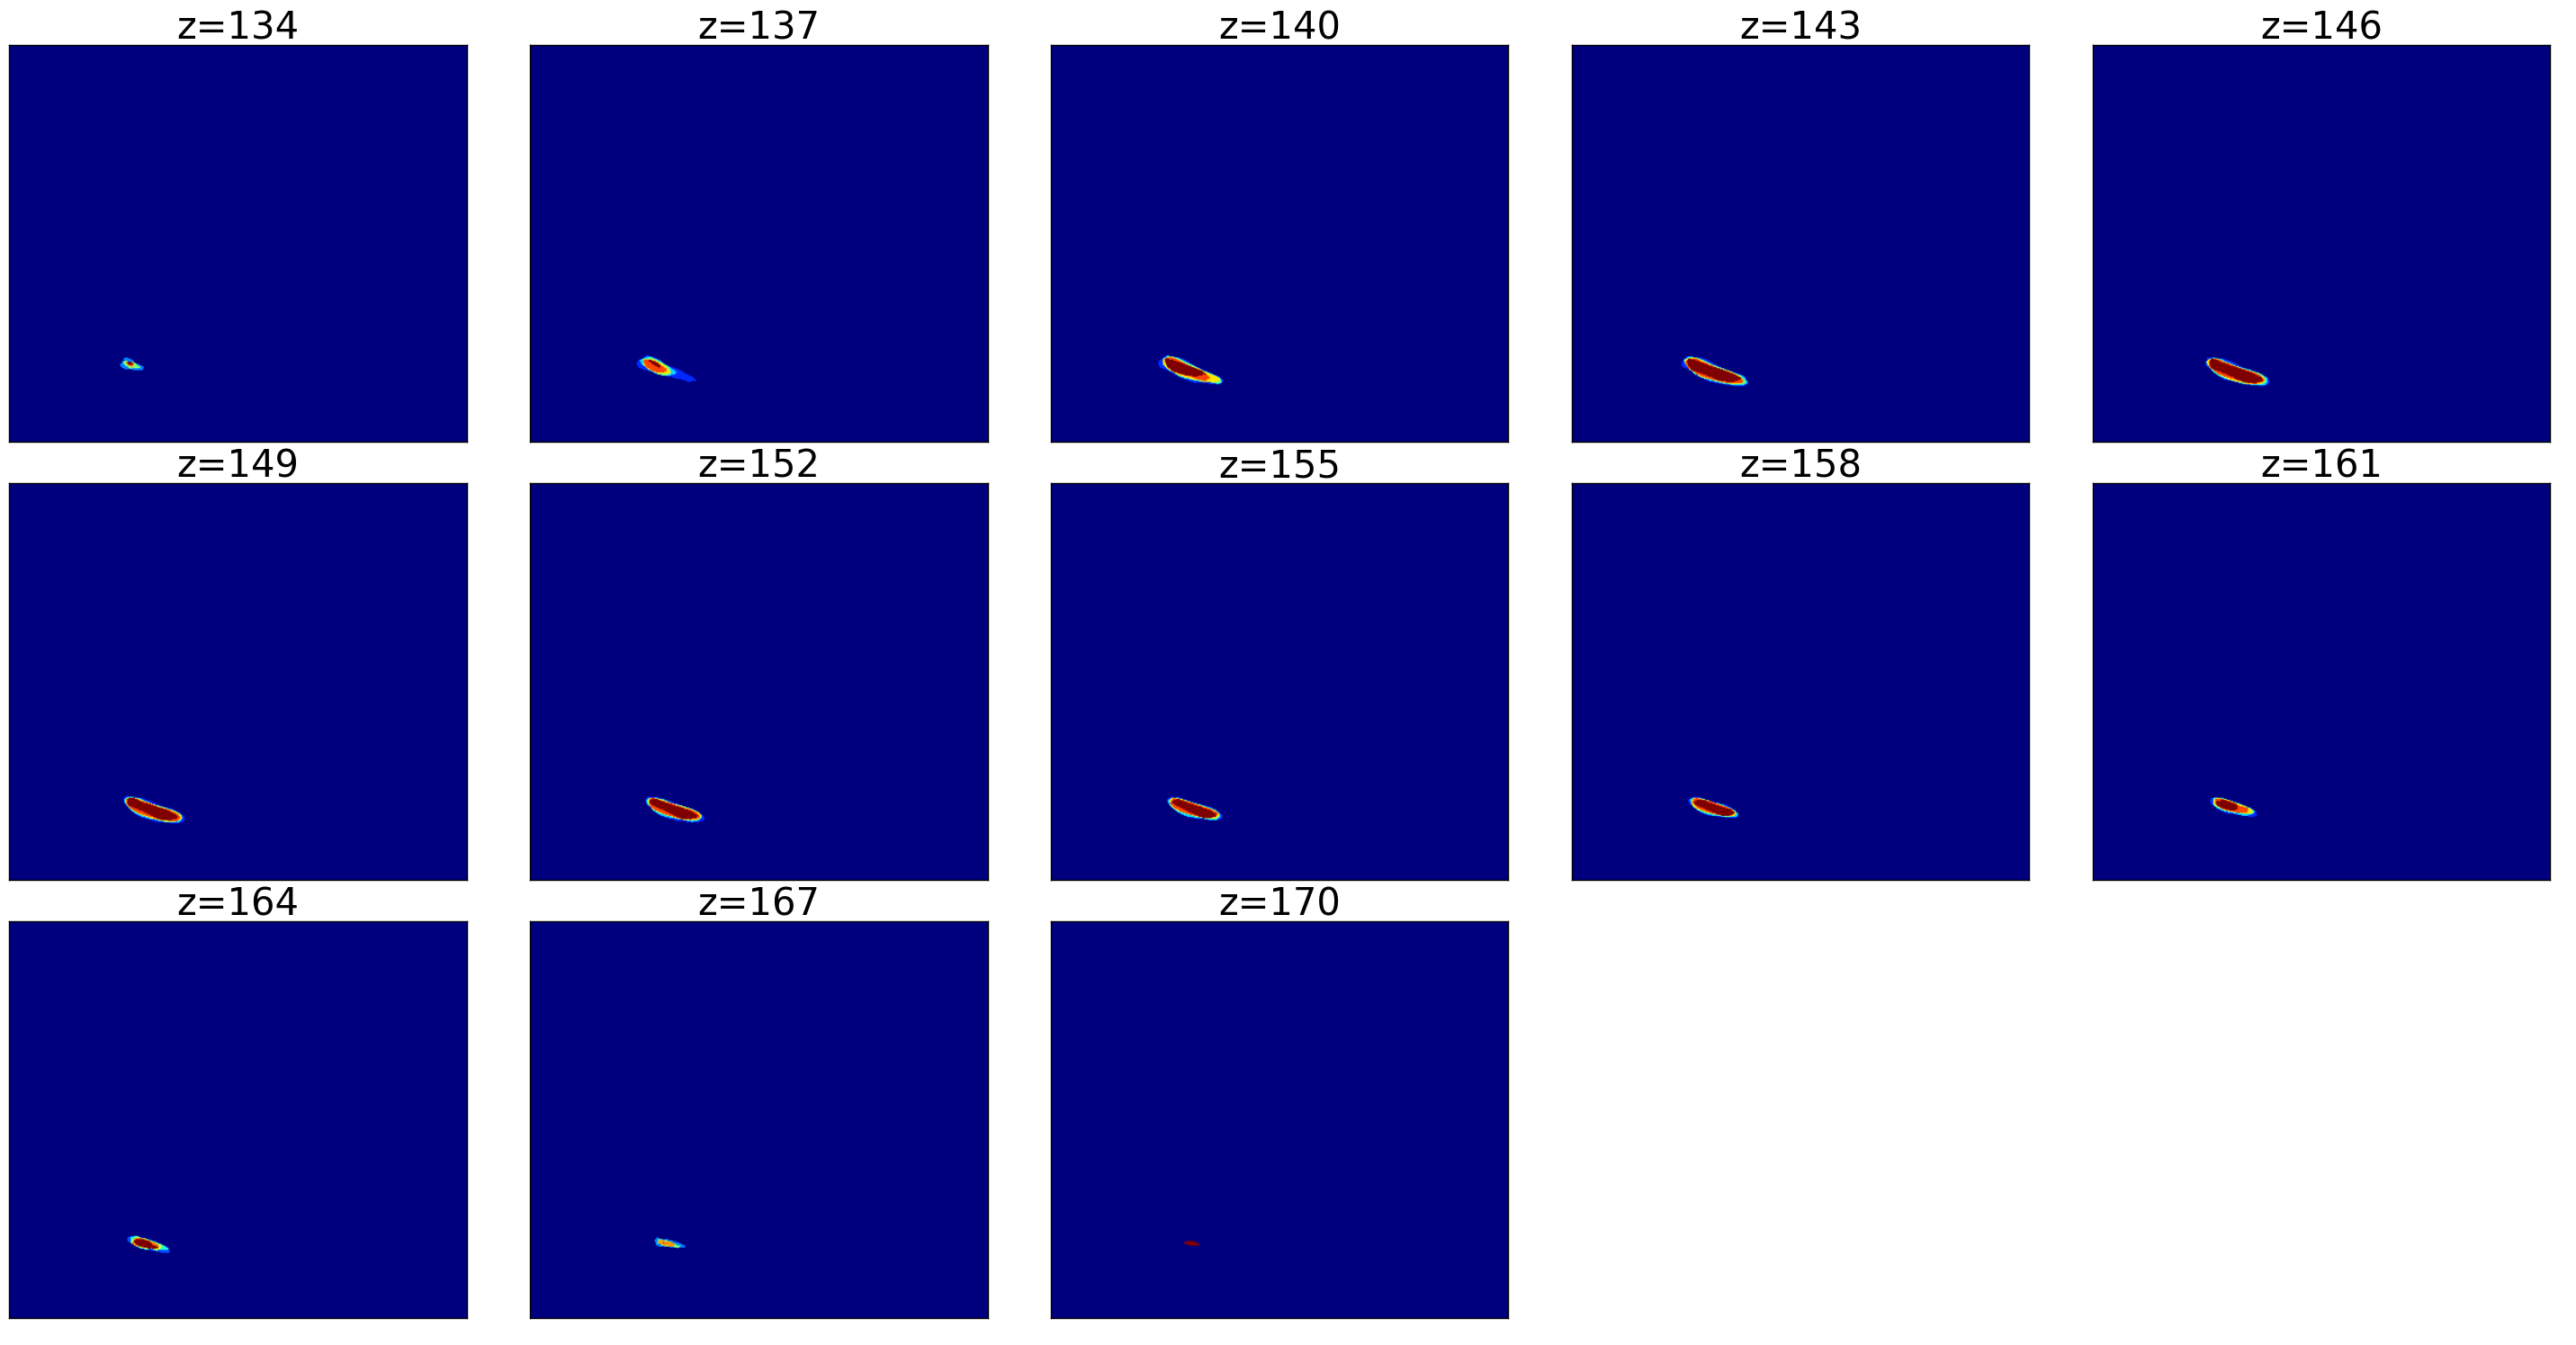

In [21]:
display_volume_sections(atlas_prob_volume_allLandmarks['Tz_L'], every=3)

In [22]:
# Save atlas score volume.

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    vol_fn = DataManager.get_volume_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    create_parent_dir_if_not_exists(vol_fn)
    bp.pack_ndarray_file(vol, vol_fn)

In [23]:
# Save atlas score volume bbox txt.

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    fn = DataManager.get_volume_bbox_filepath(stack_m=atlas_name, structure=name_s, trial_idx=None)
    np.savetxt(fn, np.array([prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax])[None,:], fmt='%d')
    # This is wrt MD589 annotation volume

# Consider Surround

In [24]:
# Generate and save surround score volumes. (in fact binary, but dtype is np.float16, same as interior score volumes.)

valid_level = .1

surround_distance_um = 200
surround_distance_voxel = surround_distance_um / XY_PIXEL_DISTANCE_TB
print "surround size (in voxels):", surround_distance_voxel

for name_s, vol in atlas_prob_volume_allLandmarks.iteritems():
    
    surround_vol = get_surround_volume(vol, valid_level=valid_level, distance=surround_distance_voxel)
    
    vol_fn = DataManager.get_volume_filepath(stack_m=atlas_name, 
                                             structure=convert_to_surround_name(name_s, 
                                                                                margin=surround_distance_um),
                                            trial_idx=None)
    print vol_fn
    create_parent_dir_if_not_exists(vol_fn)
    bp.pack_ndarray_file(surround_vol, vol_fn)

surround size (in voxels): 13.5869565217


/home/yuncong/Brain/utilities/annotation_utilities.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  roi = (vol > valid_level)[roi_ymin:roi_ymax+1, roi_xmin:roi_xmax+1, roi_zmin:roi_zmax+1]
/home/yuncong/Brain/utilities/annotation_utilities.py:65: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  surround_vol[roi_ymin:roi_ymax+1, roi_xmin:roi_xmax+1, roi_zmin:roi_zmax+1] = roi_surround_vol


/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_LRt_R_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_Sp5C_L_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_Pn_L_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_7N_R_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_PBG_L_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_VLL_L_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_VLL_R_surround_200.bp
/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/score_volumes/atlasV3_down32_scoreVolume_7N_L_surround_200.bp
/h

In [87]:
# Save surround score volume bbox txt.

for n, vol in atlas_prob_volume_allLandmarks.iteritems():
    fn = DataManager.get_volume_bbox_filepath(stack=atlas_name, 
                                              structure=convert_to_surround_name(name_s, margin=surround_distance_um),
                                             trial_idx=None)
    np.savetxt(fn, np.array([prob_vol_xmin, prob_vol_xmax, prob_vol_ymin, prob_vol_ymax, prob_vol_zmin, prob_vol_zmax])[None,:], fmt='%d')
    # This is wrt MD589 annotation volume

In [88]:
# Convert surround volumes to meshes

for name_s in structures_sided:
        
    vol_fn = DataManager.get_volume_filepath(stack=atlas_name, label=name_s+'_surround', downscale=32)
    surround_vol = bp.unpack_ndarray_file(vol_fn)
    
    xmin, xmax, ymin, ymax, zmin, zmax = bbox_3d(surround_vol > 0)
    
    polydata = volume_to_polydata(surround_vol[ymin:ymax+1, xmin:xmax+1, zmin:zmax+1], 
                                  origin=(xmin+prob_vol_xmin+ann_vol_xmin-canonical_centroid[0], 
                                       ymin+prob_vol_ymin+ann_vol_ymin-canonical_centroid[1], 
                                       zmin+prob_vol_zmin+ann_vol_zmin-canonical_centroid[2]), 
                       num_simplify_iter=3, smooth=True)
    # centered at "canonical centroid" - same as interior volumes
    
    mesh_fn = DataManager.get_mesh_filepath(stack=atlas_name, label=name_s+'_surround')
    save_mesh(polydata, mesh_fn)

marching cube: 0.08 seconds
mesh_to_polydata: 0.04 seconds
simplify 0 @ 30127: 0.27 seconds
simplify 1 @ 6028: 0.26 seconds
simplify 2 @ 1208: 0.05 seconds
marching cube: 0.06 seconds
mesh_to_polydata: 0.03 seconds
simplify 0 @ 30118: 0.26 seconds
simplify 1 @ 6026: 0.26 seconds
simplify 2 @ 1208: 0.09 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.02 seconds
simplify 0 @ 8527: 0.07 seconds
simplify 1 @ 1708: 0.06 seconds
simplify 2 @ 344: 0.01 seconds
marching cube: 0.01 seconds
mesh_to_polydata: 0.01 seconds
simplify 0 @ 8515: 0.07 seconds
simplify 1 @ 1706: 0.06 seconds
simplify 2 @ 344: 0.01 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39329: 0.37 seconds
simplify 1 @ 7869: 0.38 seconds
simplify 2 @ 1577: 0.08 seconds
marching cube: 0.08 seconds
mesh_to_polydata: 0.05 seconds
simplify 0 @ 39362: 0.37 seconds
simplify 1 @ 7875: 0.37 seconds
simplify 2 @ 1578: 0.07 seconds
marching cube: 0.17 seconds
mesh_to_polydata: 0.05 seconds
simplify 

In [356]:
# surround_vol = get_surround_volume(atlas_prob_volume_allLandmarks['Pn_L'], distance=15, valid_level=0.1)
# display_volume_sections(surround_vol)

# Load and display meshes

In [12]:
# Load canonical info

canonical_locations = read_dict_from_txt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_locations.txt'), key_converter=str)
canonical_centroid = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_centroid.txt'))
canonical_normal = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'canonical_normal.txt'))

In [13]:
# Load atlas meshes

atlas_space_structure_meshes = DataManager.load_meshes(stack_m=atlas_name, trial_idx=None, sided=True)

load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV3/atlasV3_down32_scoreVolume/atlasV3_down32_scoreVolume_sp5.stl
Mesh is empty: sp5.
Error loading mesh for sp5.
load_mesh_stl: File does not exist /home/yuncong/CSHL_meshes/atlasV3/atlasV3_down32_scoreVolume/atlasV3_down32_scoreVolume_outerContour.stl
Mesh is empty: outerContour.
Error loading mesh for outerContour.


In [27]:
# # Load atlas structure surround meshes

# atlas_space_structure_surround_meshes = {
#     name_s: DataManager.load_mesh(stack=atlas_name, label=name_s + '_surround', return_polydata_only=True)
#     for name_s in structures_sided}

In [30]:
# # Load structure prob volumes

# atlas_space_structure_volumes = {}
# for name_s in structures_sided:    
#     volume = bp.unpack_ndarray_file(os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume', 'prob_volume_%s.bp'%name_s))
#     origin = np.loadtxt(os.path.join(MESH_ROOTDIR, atlas_name, 'structure_prob_volume', 'prob_volume_origin_%s.txt'%name_s))
#     atlas_space_structure_volumes[name_s] = (volume, origin)

In [182]:
# Load shell
shell_polydata = DataManager.load_shell_mesh(stack=stack_fixed, downscale=32)

In [24]:
# Create actors

all_atlas_structure_mesh_actors = [actor_mesh(polydata, structure_to_color[convert_to_original_name(n)]/255.,
                                             wireframe=False) 
                                   for n, polydata in atlas_space_structure_meshes.iteritems()]

In [ ]:
# all_atlas_structure_surround_mesh_actors = [actor_mesh(polydata, color=(1,1,1),
#                                                       wireframe=True) 
#                                             for n, polydata in atlas_space_structure_surround_meshes.iteritems()]

# Load probabilistic structure volumes

In [12]:
atlas_space_structure_volumes = DataManager.load_prob_shapes(stack_m=atlas_name, trial_idx=None, sided=True)

[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/probabilistic_shapes/atlasV3_down32_scoreVolume_sp5.bp'
Error loading probablistic shape for sp5.
[Errno 2] No such file or directory: '/home/yuncong/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume/probabilistic_shapes/atlasV3_down32_scoreVolume_outerContour.bp'
Error loading probablistic shape for outerContour.


In [27]:
# Interactively visualize a structure as prob. volume.

prob_vol, origin = atlas_space_structure_volumes['IC']

prob_vol_smoothed = gaussian(prob_vol_symmetric, 2) # Smooth the probability 
prob_vol_thresh = prob_vol_smoothed >= .5
prob_vol_thresholded_polydata = volume_to_polydata(prob_vol_thresh, origin, num_simplify_iter=3, smooth=True)
launch_vtk([actor_mesh(prob_vol_thresholded_polydata, color=(1,1,1), wireframe=False)], init_angle='coronal')

marching cube: 0.52 seconds
mesh_to_polydata: 0.08 seconds
simplify 0 @ 64543: 0.69 seconds
simplify 1 @ 12910: 0.68 seconds
simplify 2 @ 2583: 0.15 seconds


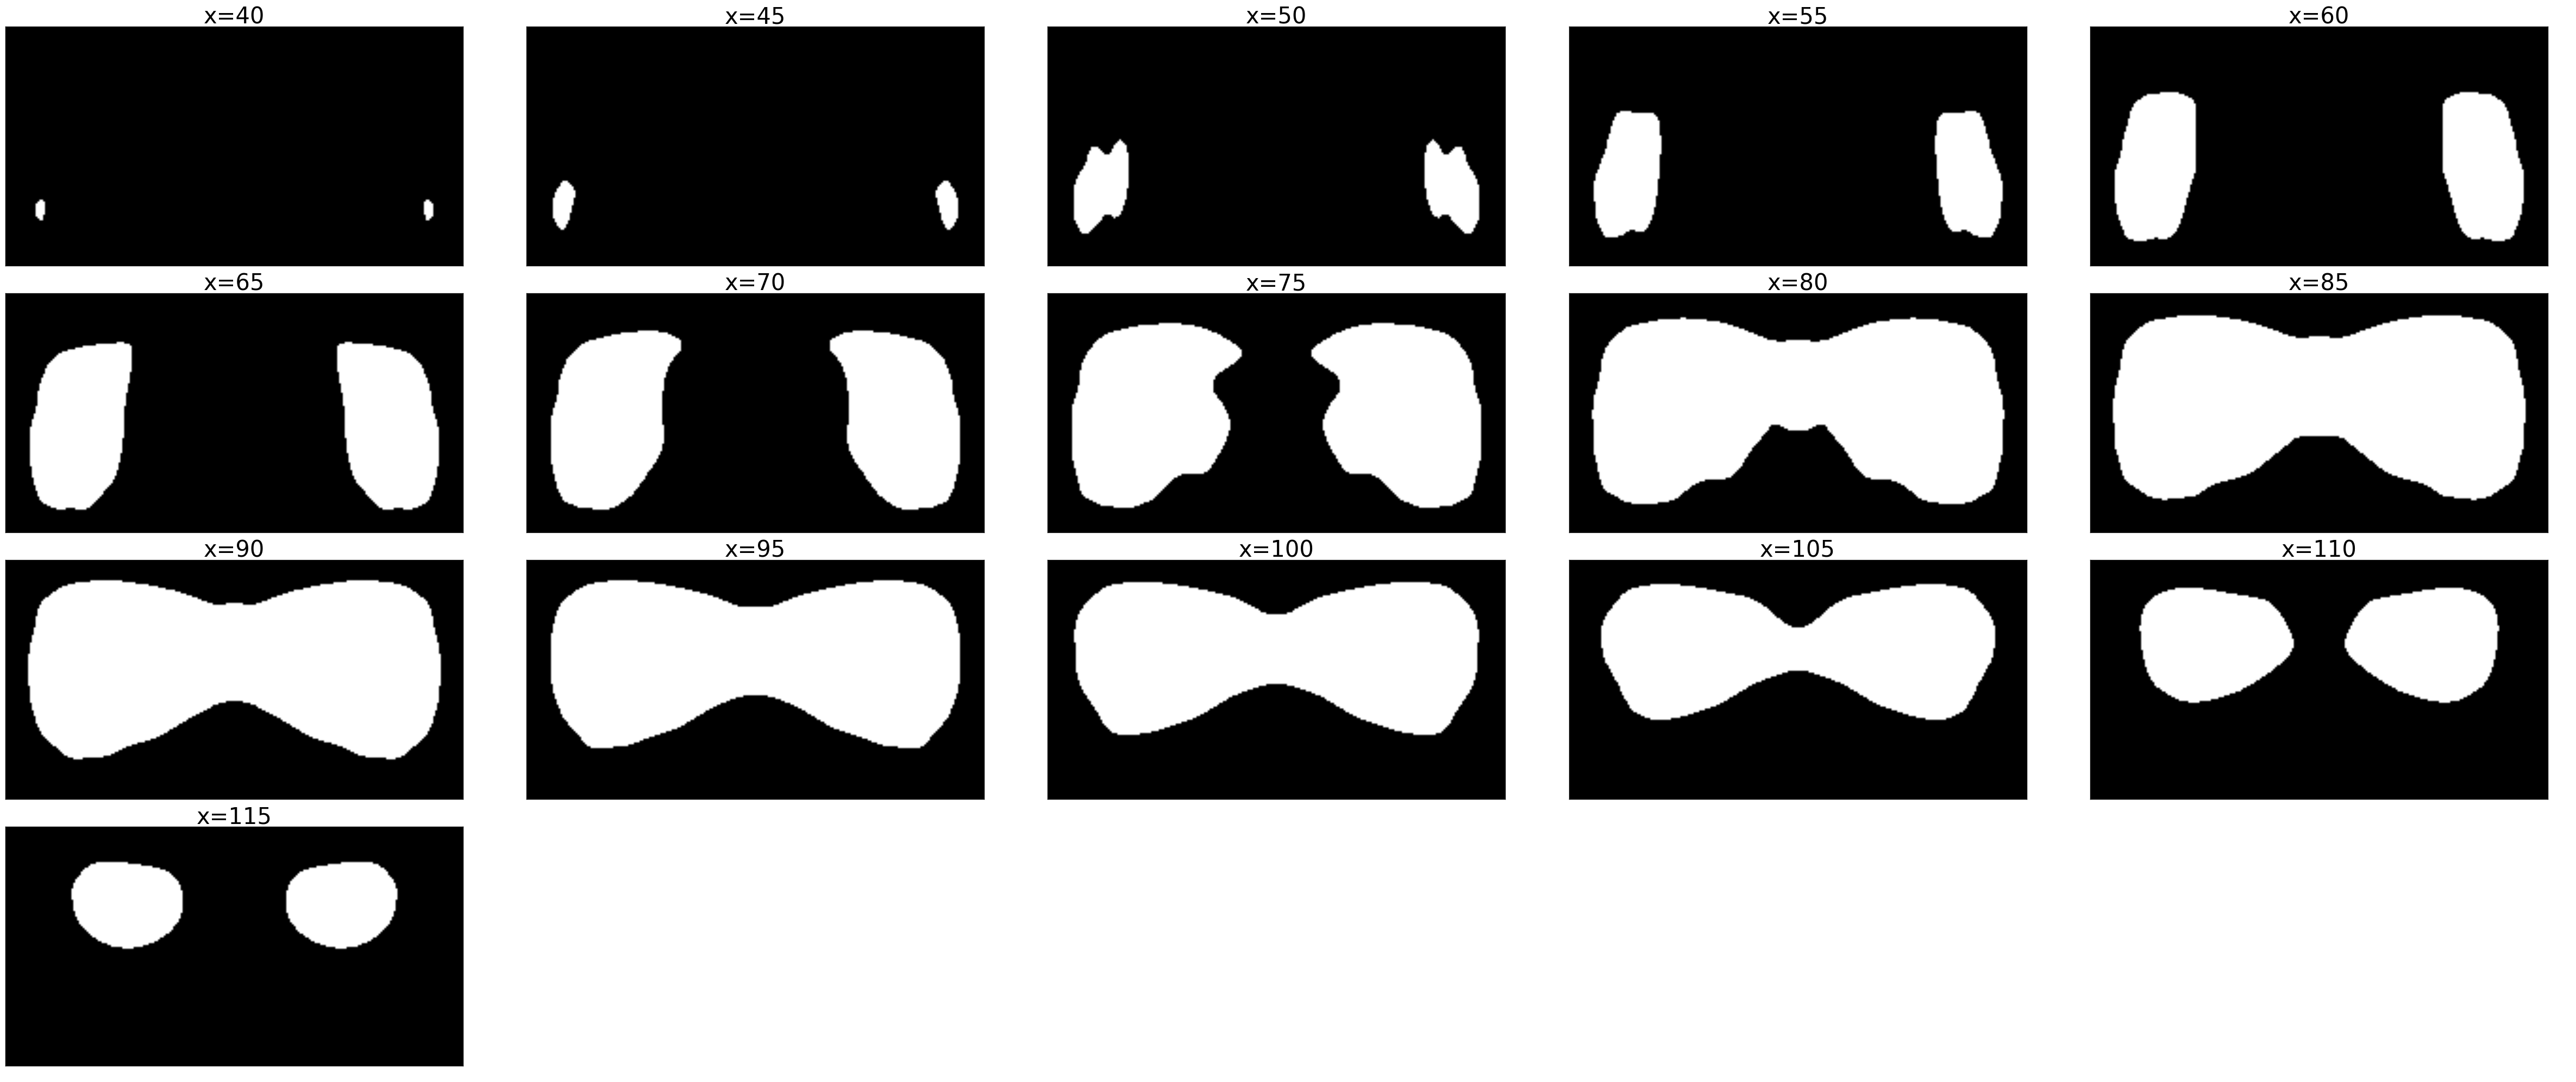

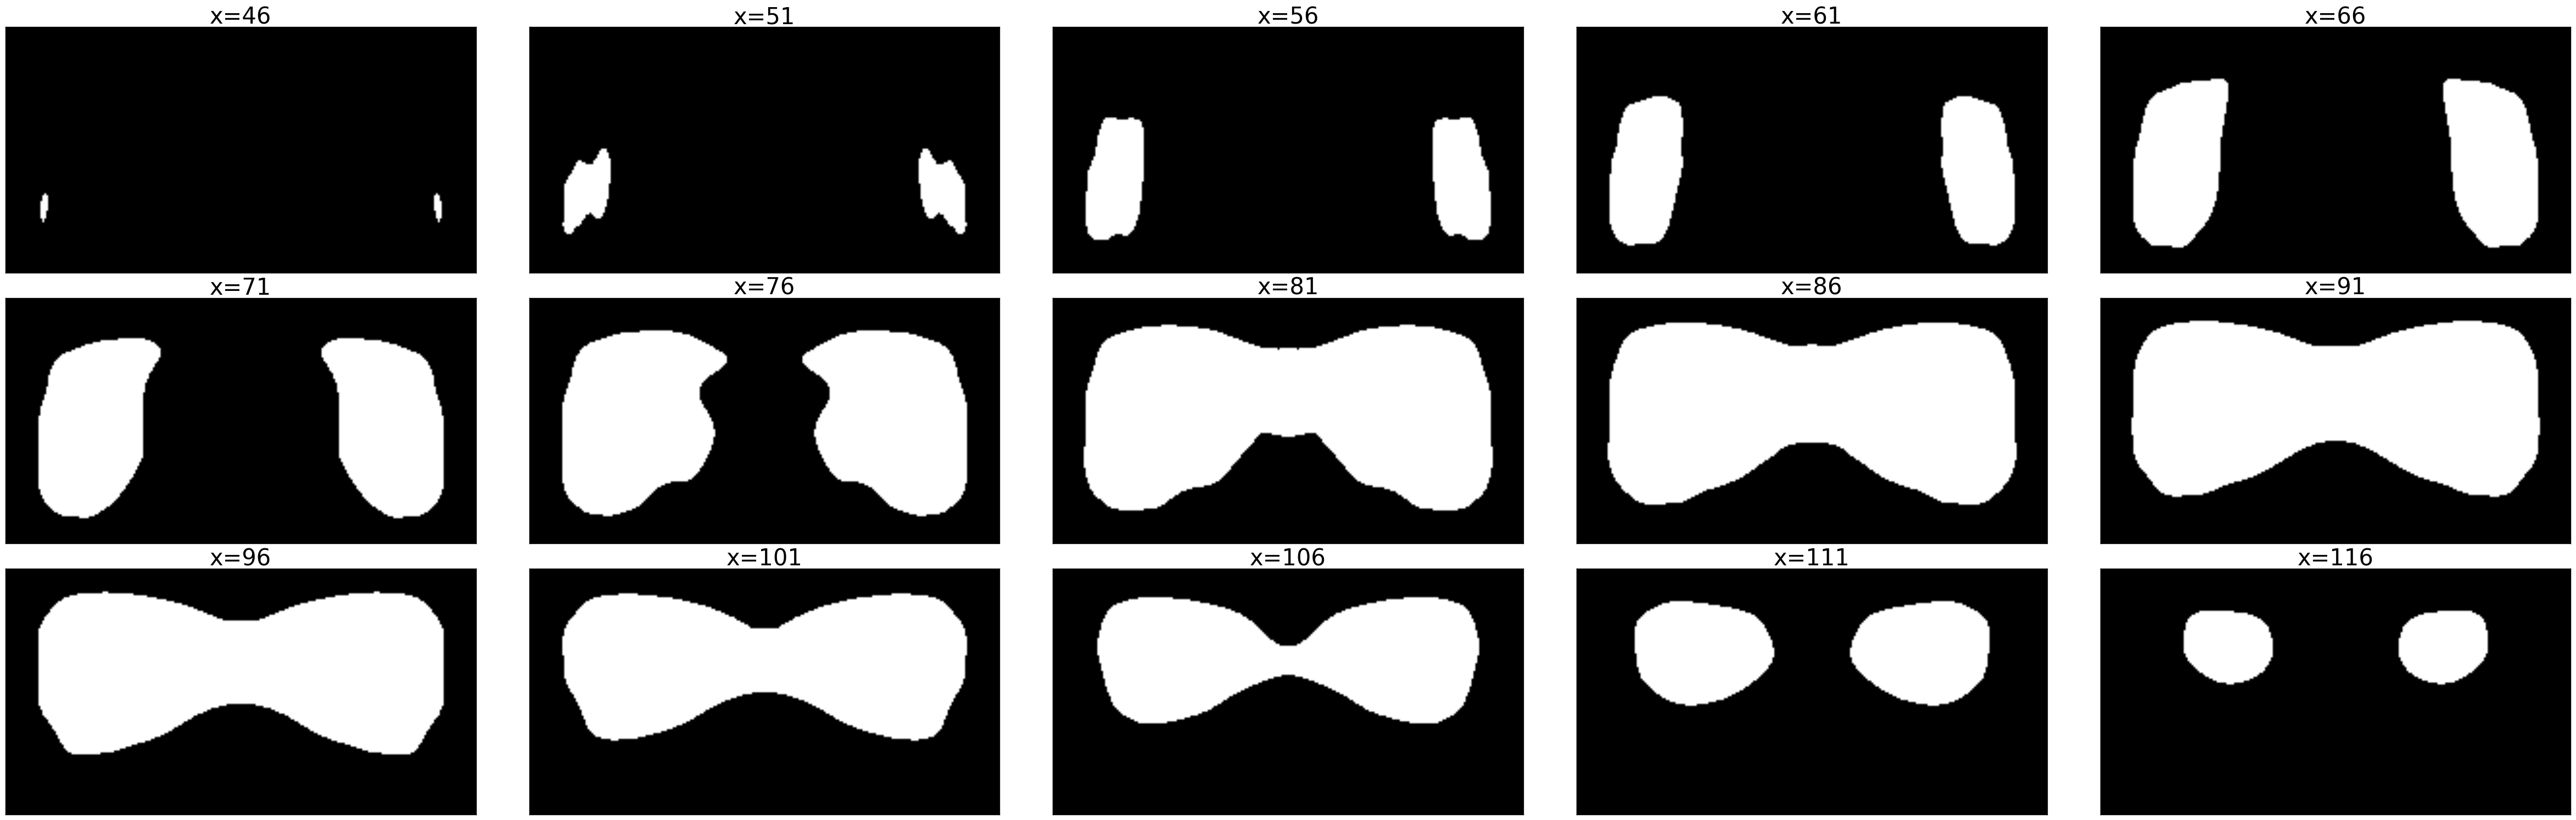

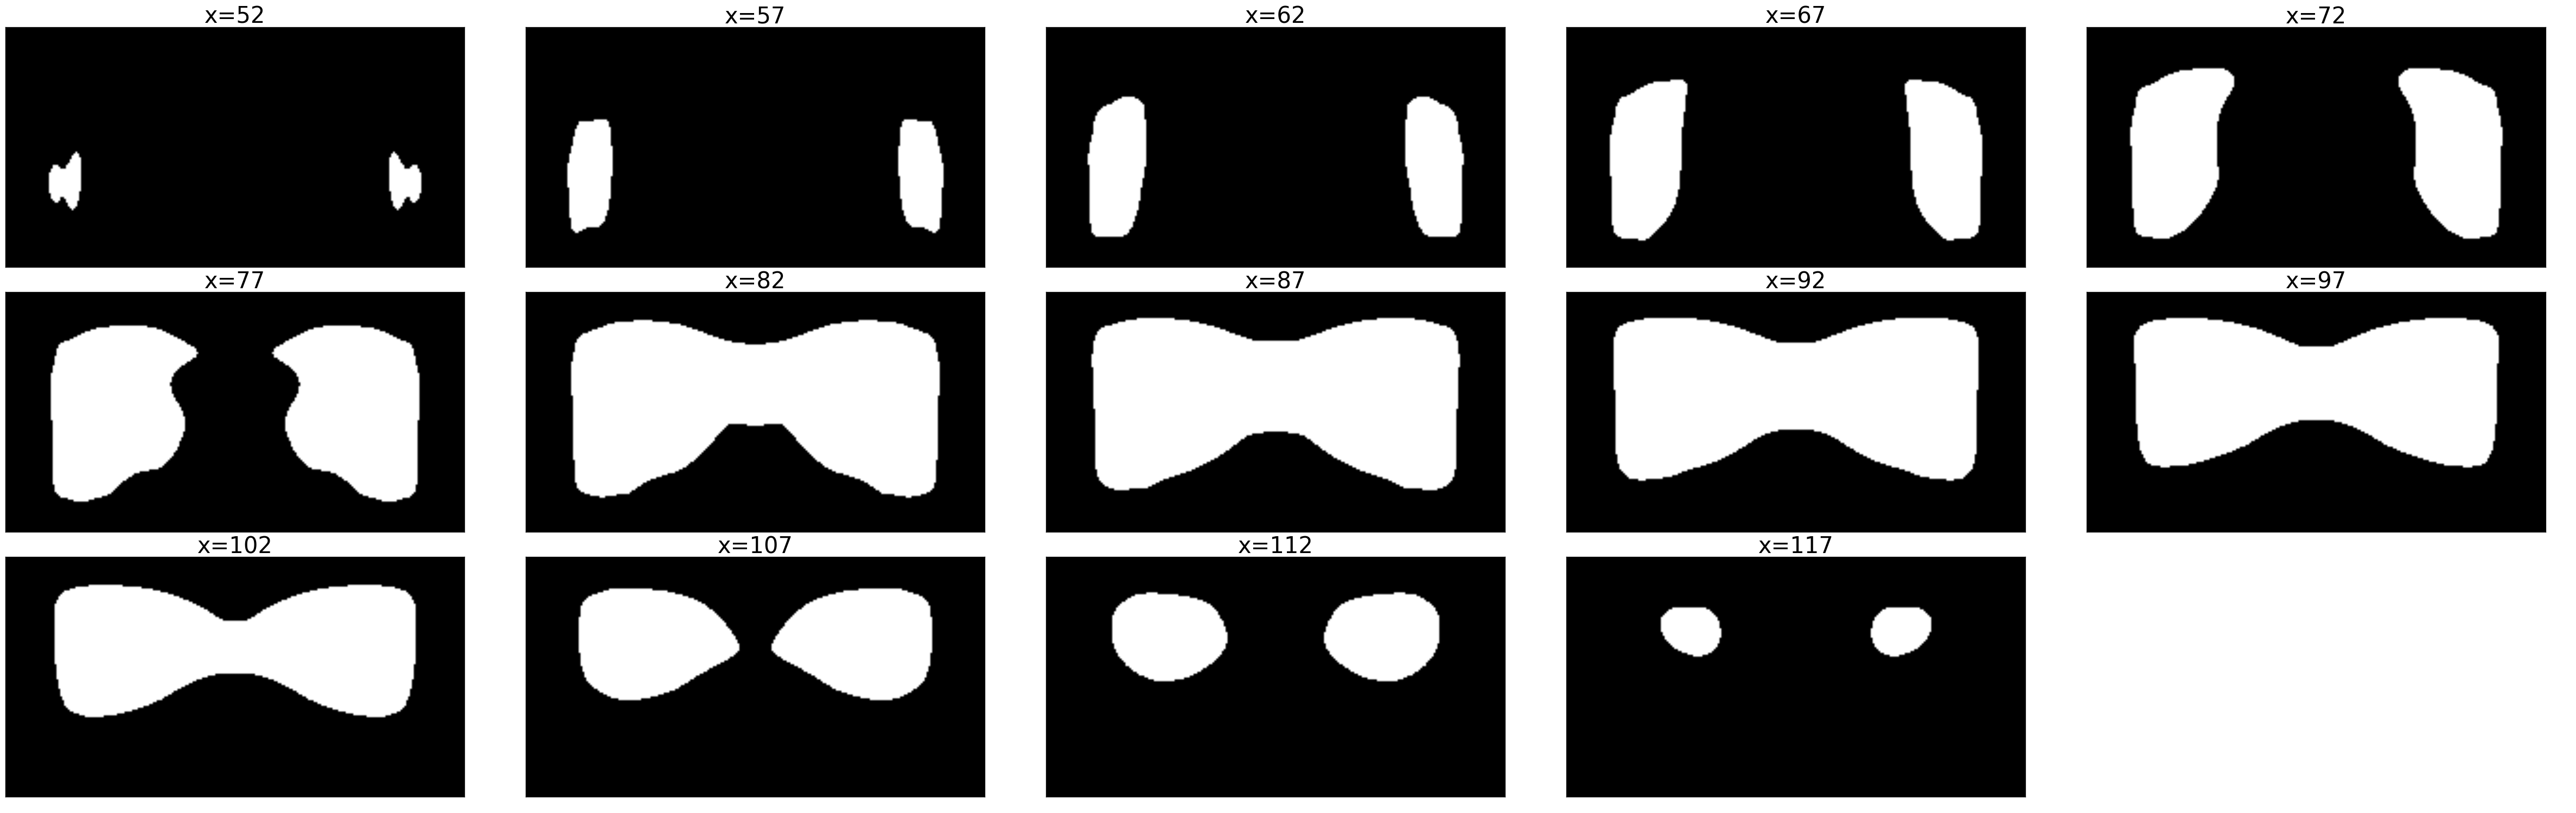

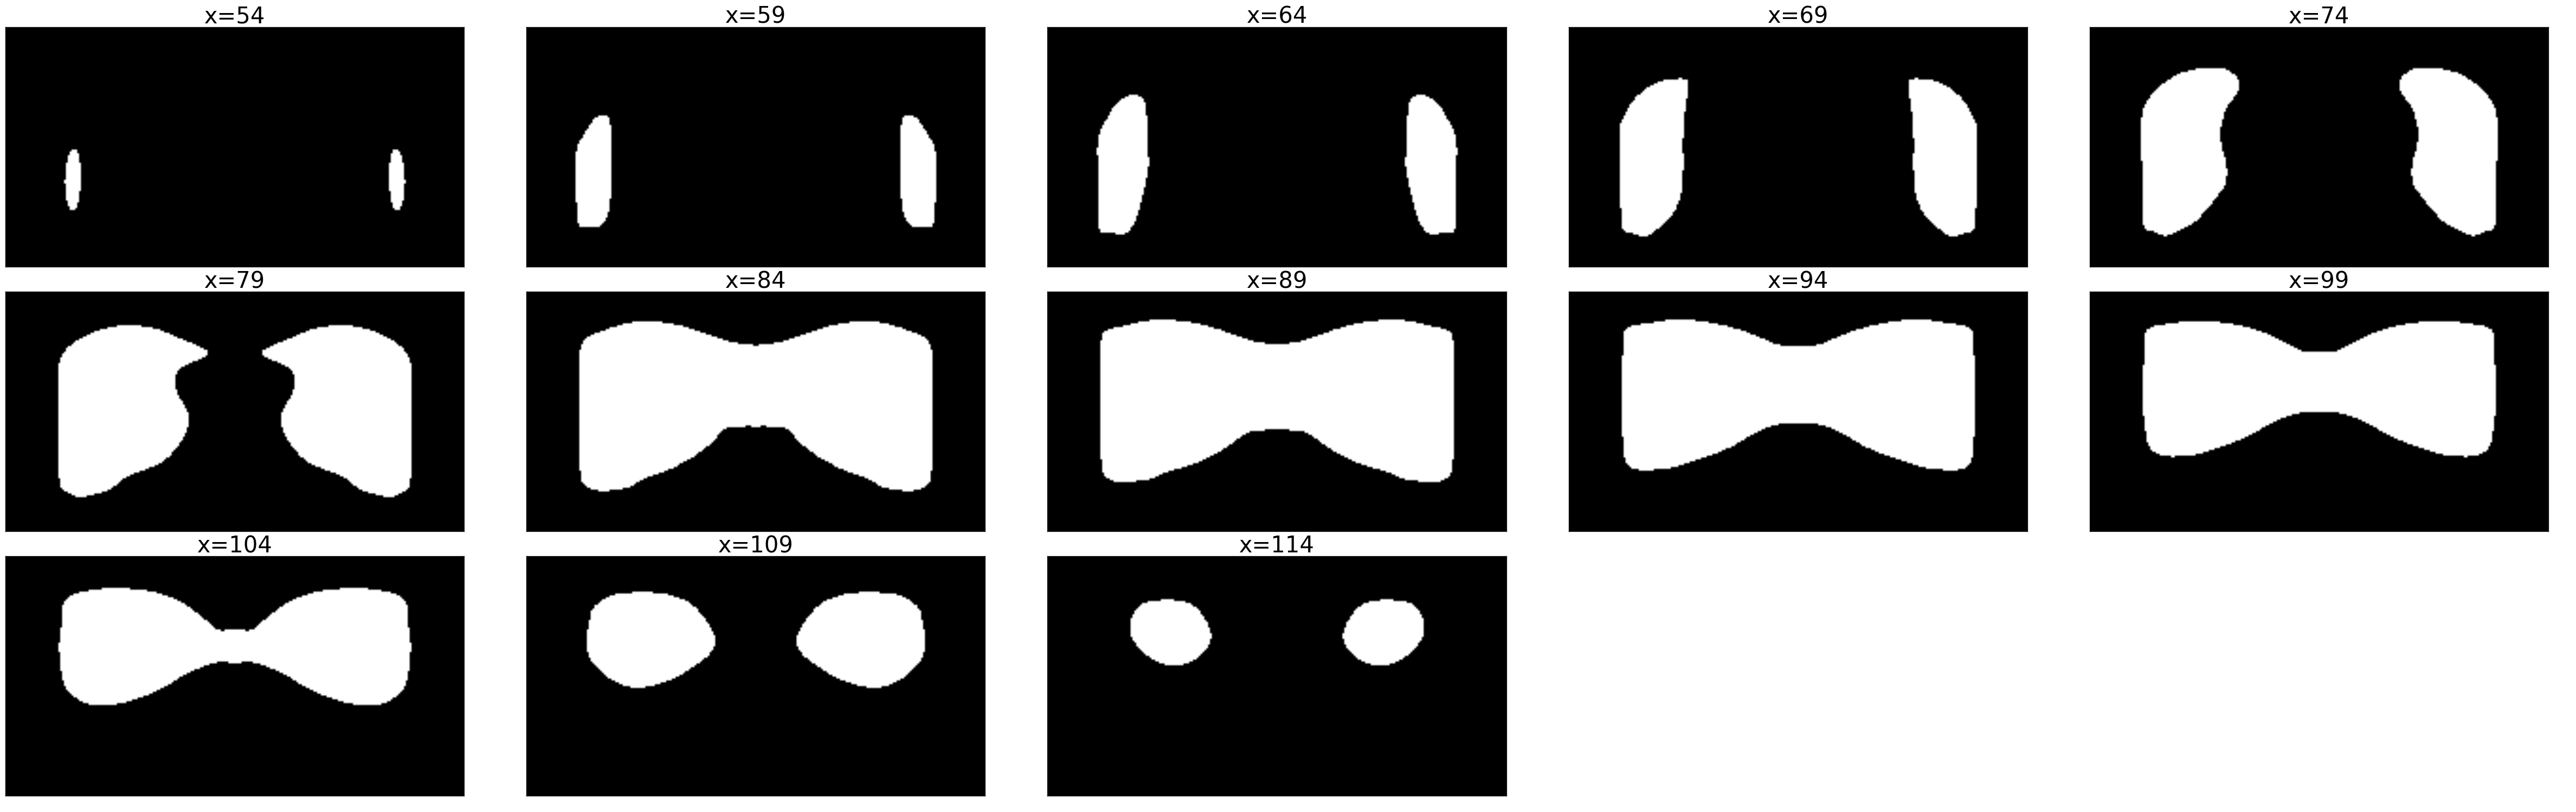

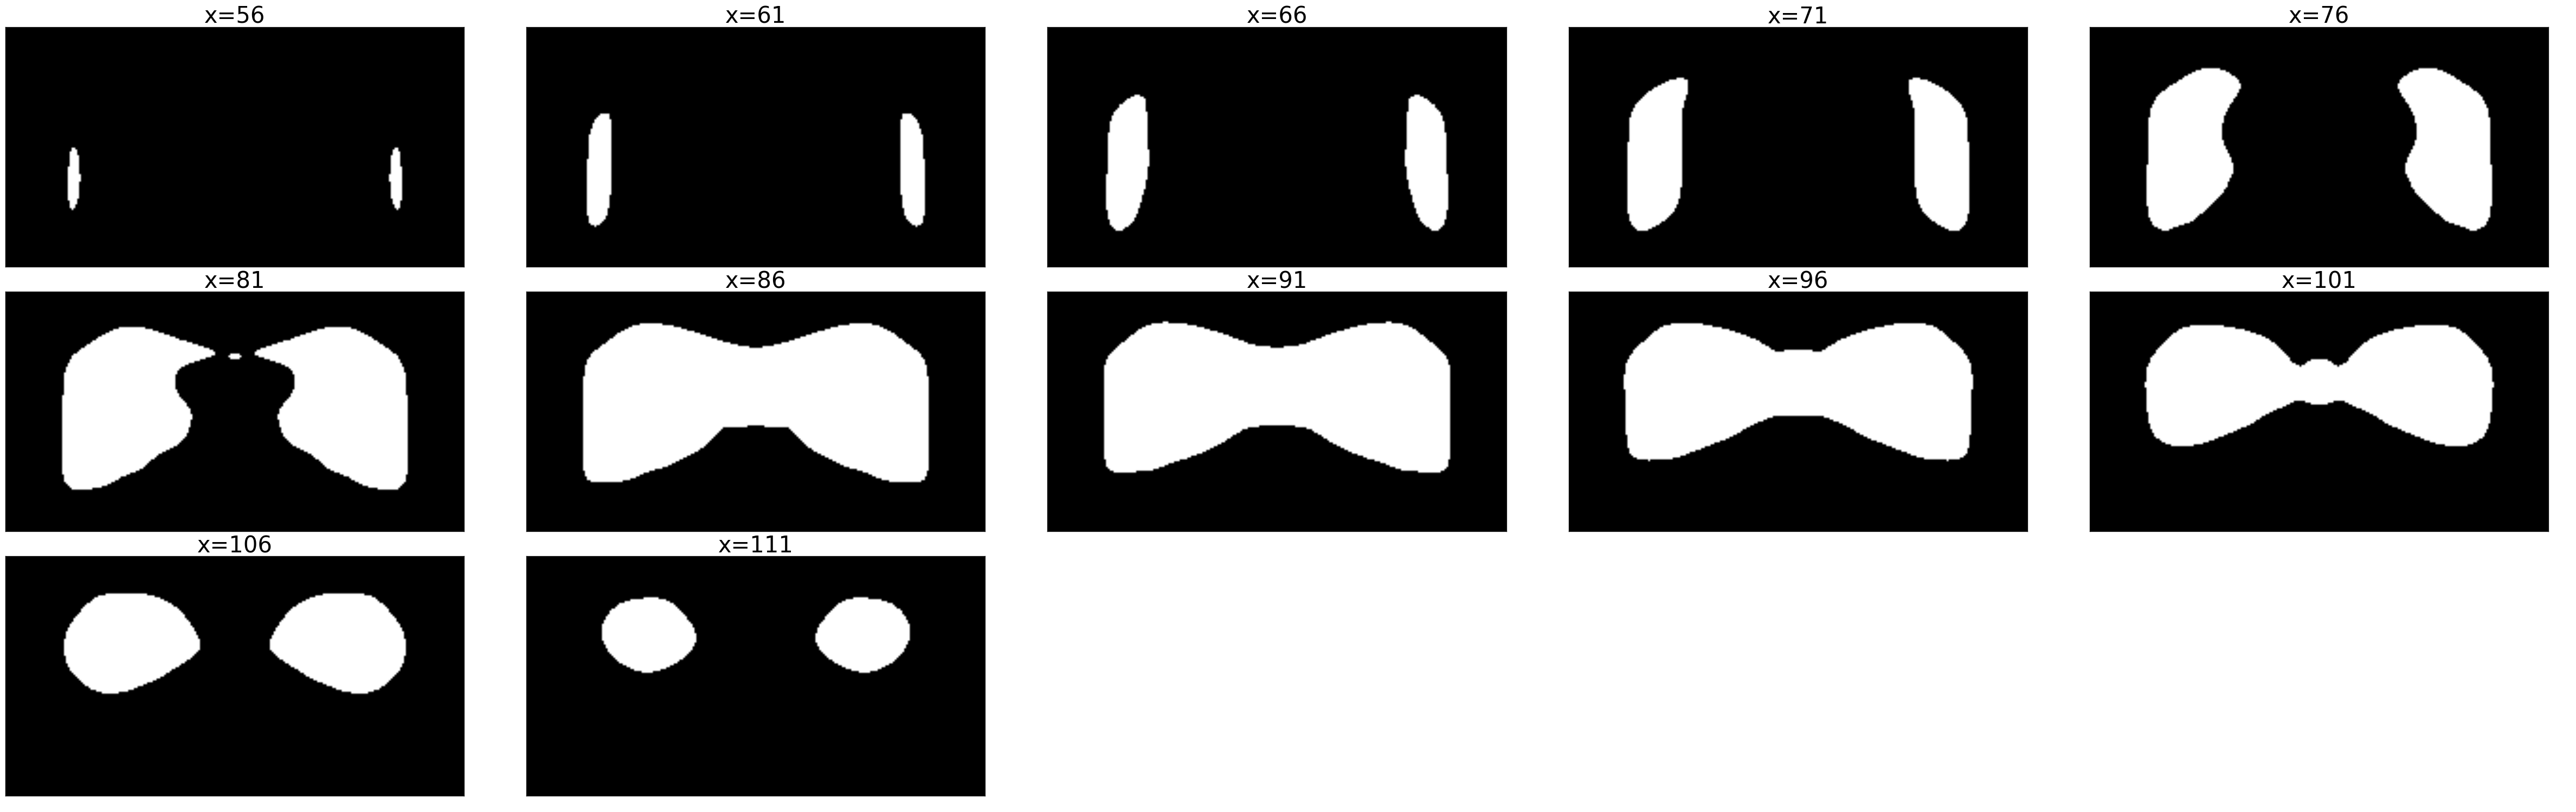

In [35]:
for level in np.arange(.5, 1, .1):
#     display_volume_sections(prob_vol >= level, every=5, cmap=plt.cm.gray, direction='x')
    display_volume_sections(prob_vol_smoothed >= level, every=5, cmap=plt.cm.gray, direction='x')

In [46]:
# Visualize all structures as prob. volumes.

all_atlas_structure_volume_actors = []
for name_s, (volume, origin) in atlas_space_structure_volumes.iteritems():
    name_u = convert_to_original_name(name_s)
    structure_volume_actor = actor_volume(volume.astype(np.float32), what='probability', origin=origin, c=structure_to_color[name_u])
    all_atlas_structure_volume_actors.append(structure_volume_actor)

In [183]:
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.15, wireframe=False, origin=-canonical_centroid)

In [28]:
launch_vtk([actor_mesh(atlas_space_structure_meshes['SNR_L'], color=(1,1,1), wireframe=True)])

In [27]:
launch_vtk([actor_mesh(atlas_space_structure_meshes['SNR_L'], color=(1,1,1), wireframe=True),
            actor_mesh(atlas_space_structure_surround_meshes['SNR_L'], color=(0,1,1), wireframe=True)])

NameError: name 'atlas_space_structure_surround_meshes' is not defined

In [165]:
launch_vtk(all_atlas_structure_mesh_actors, init_angle='coronal')

In [32]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_surround_mesh_actors)

In [181]:
launch_vtk(all_atlas_structure_mesh_actors + all_atlas_structure_volume_actors, init_angle='sagittal')

In [38]:
launch_vtk([actor_mesh(polydata, structure_colors[convert_name_to_unsided(n)]/255.) 
            for n, polydata in atlas_space_structure_meshes.iteritems()] + \
           [shell_actor], init_angle='30')

In [187]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='coronal')

In [33]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown')

In [31]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='horizontal_topDown', animate=False,
          interactive=False, snapshot_fn='/home/yuncong/snapshot_horizontal.png', snapshot_magnification=10)

In [30]:
launch_vtk(all_atlas_structure_mesh_actors + [shell_actor], init_angle='sagittal', animate=False, 
           interactive=False, snapshot_fn='/home/yuncong/snapshot_sagittal.png', snapshot_magnification=10)

In [38]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal', animate=True)

In [74]:
launch_vtk(all_atlas_structure_volume_actors + [shell_actor], init_angle='sagittal')

In [39]:
launch_vtk(all_atlas_structure_volume_actors , init_angle='sagittal')